<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [81]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EXPLORING DATA

In [82]:
train['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [83]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
774,775,20,RL,110.0,14226,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,395000
1073,1074,60,RL,75.0,7950,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,159500
1148,1149,50,RM,NaN,5700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,116900
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
80,81,60,RL,100.0,13000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,193500
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500
312,313,190,RM,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal,119900
531,532,70,RM,60.0,6155,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,128000
880,881,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,157000
476,477,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,208900


In [84]:
train.isnull().sum()


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [85]:
train.shape

(1460, 81)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [88]:
test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [89]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

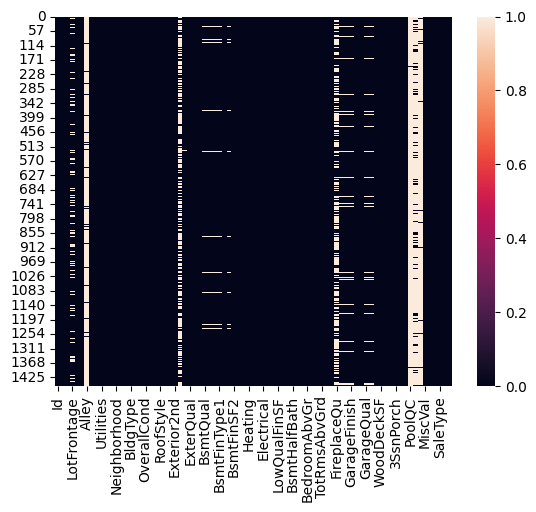

In [90]:
train.isnull().sum()
sns.heatmap(train.isnull())

In [91]:
train.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


# Cleaning Data

In [92]:
train.drop(['PoolQC'] , axis=1 , inplace= True)
train.drop(['Exterior2nd'] , axis=1 , inplace = True)

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [94]:
train['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [95]:
la= LabelEncoder()

In [96]:
obj = train.select_dtypes(include=['object'])
non_obj = train.select_dtypes(exclude=['object'])

In [97]:
for i in range(0, obj.shape[1]):
  obj.iloc[:, i] = la.fit_transform(obj.iloc[:, i])


In [98]:
obj = obj.astype('int')

In [99]:
train= pd.concat([obj , non_obj] , axis=1)

In [100]:
train


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,2,3,3,0,4,0,5,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,2,3,3,0,2,0,24,1,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,2,0,3,0,4,0,5,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,2,0,3,0,0,0,6,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,2,0,3,0,2,0,15,2,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,2,3,3,0,4,0,8,2,...,0,40,0,0,0,0,0,8,2007,175000
1456,3,1,2,3,3,0,4,0,14,2,...,349,0,0,0,0,0,0,2,2010,210000
1457,3,1,2,3,3,0,4,0,6,2,...,0,60,0,0,0,0,2500,5,2010,266500
1458,3,1,2,3,3,0,4,0,12,2,...,366,0,112,0,0,0,0,4,2010,142125


In [101]:
train.dtypes

,0
MSZoning,int64
Street,int64
Alley,int64
LotShape,int64
LandContour,int64
...,...
PoolArea,int64
MiscVal,int64
MoSold,int64
YrSold,int64


In [102]:
train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Id',
       'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'G

<Axes: >

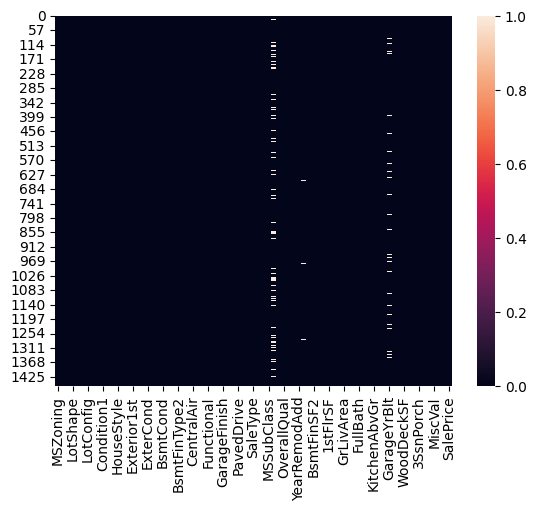

In [103]:
sns.heatmap(train.isnull())


In [104]:
train.MSSubClass = train.MSSubClass.fillna(train.MSSubClass.median())

In [105]:
train.GarageYrBlt = train.GarageYrBlt.fillna(train.GarageYrBlt.median())

In [106]:
train.YearRemodAdd = train.YearRemodAdd.fillna(train.YearRemodAdd.median())

In [107]:
train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.median())

In [108]:
train.MasVnrArea = train.MasVnrArea.fillna(train.MasVnrArea.median())

In [109]:
train.isnull().sum()

,0
MSZoning,0
Street,0
Alley,0
LotShape,0
LandContour,0
...,...
PoolArea,0
MiscVal,0
MoSold,0
YrSold,0


In [110]:
train.shape

(1460, 79)

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   int64  
 1   Street         1460 non-null   int64  
 2   Alley          1460 non-null   int64  
 3   LotShape       1460 non-null   int64  
 4   LandContour    1460 non-null   int64  
 5   Utilities      1460 non-null   int64  
 6   LotConfig      1460 non-null   int64  
 7   LandSlope      1460 non-null   int64  
 8   Neighborhood   1460 non-null   int64  
 9   Condition1     1460 non-null   int64  
 10  Condition2     1460 non-null   int64  
 11  BldgType       1460 non-null   int64  
 12  HouseStyle     1460 non-null   int64  
 13  RoofStyle      1460 non-null   int64  
 14  RoofMatl       1460 non-null   int64  
 15  Exterior1st    1460 non-null   int64  
 16  MasVnrType     1460 non-null   int64  
 17  ExterQual      1460 non-null   int64  
 18  ExterCon

In [112]:
train.shape

(1460, 79)

In [113]:
train.drop(['Alley'] , axis=1 , inplace=True)


In [114]:
train.drop(['Fence','MiscFeature'],axis=1,inplace=True)


<Axes: >

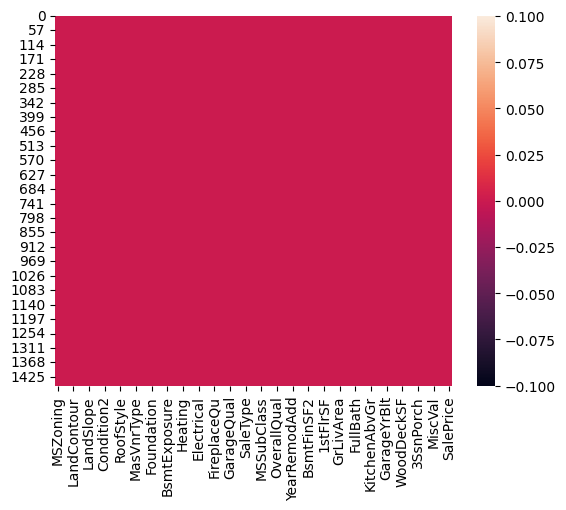

In [115]:
sns.heatmap(train.isnull())

# Cleaninig Test Data

In [116]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [117]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [118]:
test.shape

(1459, 80)

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [120]:
test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


<Axes: >

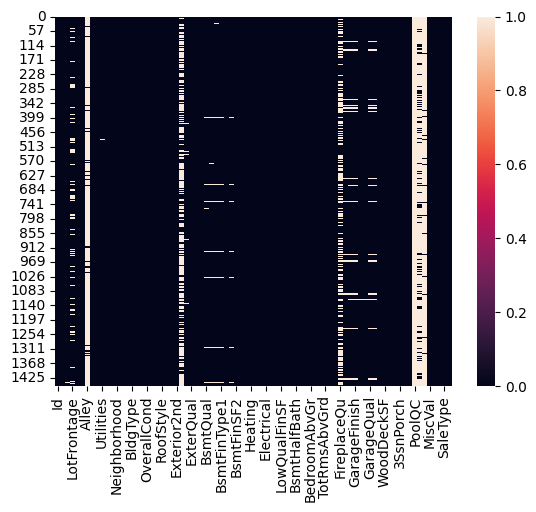

In [121]:
sns.heatmap(test.isnull())

In [122]:
la= LabelEncoder()





In [123]:
obj = test.select_dtypes(include=['object'])
non_obj = test.select_dtypes(exclude=['object'])

In [124]:
for i in range(0, obj.shape[1]):
  obj.iloc[:, i] = la.fit_transform(obj.iloc[:, i])

In [125]:
obj = obj.astype('int')

In [126]:
test= pd.concat([obj , non_obj] , axis=1)

In [127]:
train.MSSubClass = train.MSSubClass.fillna(train.MSSubClass.median())

In [128]:
train.SaleCondition = train.SaleCondition.fillna(train.SaleCondition.median())

In [129]:
train.OverallCond = train.OverallCond.fillna(train.OverallCond.median())

In [130]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['FireplaceQu'] = test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test.drop(['GarageYrBlt'], axis=1, inplace=True)


<Axes: >

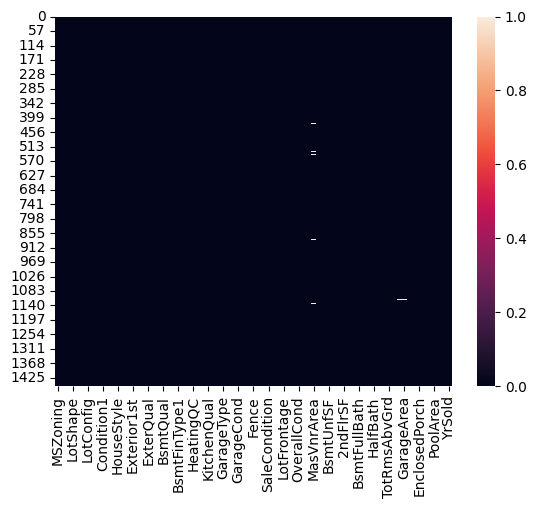

In [131]:
sns.heatmap(test.isnull())

In [132]:
test['OverallCond'] = test['OverallCond'].fillna(test['OverallCond'].mean())


In [133]:
train.dropna(inplace=True)


<Axes: >

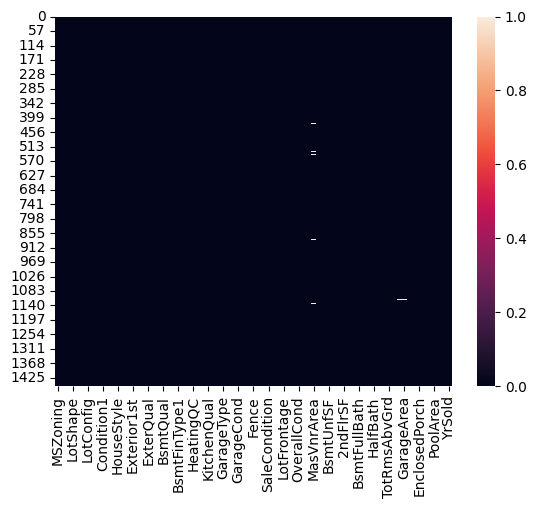

In [134]:
sns.heatmap(test.isnull())

# Concatinating the datam

In [135]:
final_df=pd.concat([train,test],axis=0)

In [136]:
final_df['SalePrice']


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN


In [137]:
final_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Alley,Exterior2nd,PoolQC,Fence,MiscFeature
0,3,1,3,3,0,4,0,5,2,2,...,0,0,2,2008,208500.0,NaN,NaN,NaN,NaN,NaN
1,3,1,3,3,0,2,0,24,1,2,...,0,0,5,2007,181500.0,NaN,NaN,NaN,NaN,NaN
2,3,1,0,3,0,4,0,5,2,2,...,0,0,9,2008,223500.0,NaN,NaN,NaN,NaN,NaN
3,3,1,0,3,0,0,0,6,2,2,...,0,0,2,2006,140000.0,NaN,NaN,NaN,NaN,NaN
4,3,1,0,3,0,2,0,15,2,2,...,0,0,12,2008,250000.0,NaN,NaN,NaN,NaN,NaN


In [138]:
final_df.shape

(2919, 81)

In [139]:
final_df


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Alley,Exterior2nd,PoolQC,Fence,MiscFeature
0,3,1,3,3,0,4,0,5,2,2,...,0,0,2,2008,208500.0,NaN,NaN,NaN,NaN,NaN
1,3,1,3,3,0,2,0,24,1,2,...,0,0,5,2007,181500.0,NaN,NaN,NaN,NaN,NaN
2,3,1,0,3,0,4,0,5,2,2,...,0,0,9,2008,223500.0,NaN,NaN,NaN,NaN,NaN
3,3,1,0,3,0,0,0,6,2,2,...,0,0,2,2006,140000.0,NaN,NaN,NaN,NaN,NaN
4,3,1,0,3,0,2,0,15,2,2,...,0,0,12,2008,250000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,0,0,6,2006,NaN,2.0,5.0,2.0,4.0,3.0
1455,4,1,3,3,0,4,0,10,2,2,...,0,0,4,2006,NaN,2.0,5.0,2.0,4.0,3.0
1456,3,1,3,3,0,4,0,11,2,2,...,0,0,9,2006,NaN,2.0,12.0,2.0,4.0,3.0
1457,3,1,3,3,0,4,0,11,2,2,...,0,700,7,2006,NaN,2.0,14.0,2.0,2.0,2.0


In [140]:
main_df=train.copy()


In [141]:
test.drop(['Alley'] , axis=1 , inplace=True)
test.drop(['Fence','MiscFeature'],axis=1,inplace=True)


In [142]:
test.shape

(1459, 76)

<Axes: >

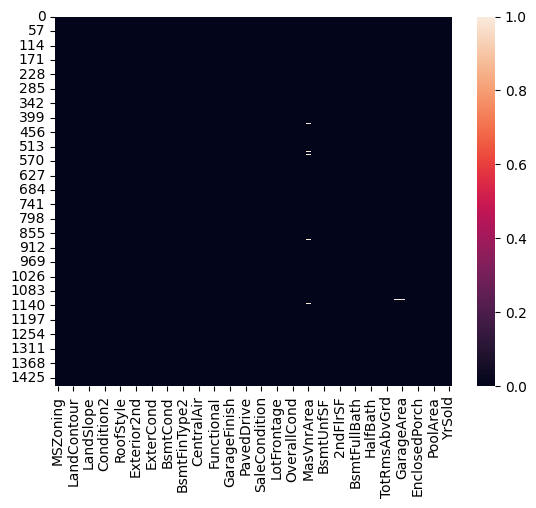

In [143]:
sns.heatmap(test.isnull())

In [144]:
final_df.shape

(2919, 81)

In [145]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [146]:
len(columns)

39

In [147]:
main_df= train.copy()

In [148]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [149]:
final_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Id', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'Garag

In [150]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [151]:
final_df.shape

(2919, 257)

In [152]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [153]:
final_df.shape

(2919, 66)

In [177]:
df_train = final_df.iloc[:1422,:]
df_test = final_df.iloc[1422:,:]

In [179]:
df_test.drop('SalePrice' , axis=1 , inplace= True)

In [159]:
df_test.shape

(1497, 65)

In [163]:
final_df.shape

(2919, 66)

In [165]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,False,False,False,False,False,False,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,False,False,False,False,False,False,True
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,False,False,False,False,False,False,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,False,False,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,True,False,False,False,False,False,False,False,False,False


In [180]:
df_train.SalePrice

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1417,340000.0
1418,124000.0
1419,223000.0
1420,179900.0


# Machine Learning side

In [162]:
model = XGBClassifier()


In [166]:
df_train = final_df.iloc[:1422,:]
df_test = final_df.iloc[1422:,:]

In [167]:
x_train=df_train.drop('SalePrice' , axis=1)
y_train = df_train['SalePrice']

In [172]:
import xgboost
Classifier = xgboost.XGBRegressor()
Classifier.fit(x_train, y_train )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [173]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(Classifier , open(filename , 'wb'))

In [181]:
y_pred = Classifier.predict(df_test)

In [182]:
y_pred

array([147615.14, 190282.38, 153969.02, ..., 166996.86, 131154.58,
       239056.4 ], dtype=float32)

# Create simple Submission file and Submit

In [186]:
prediction = pd.DataFrame(y_pred, columns=['SalePrice'])
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], prediction], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('Submission.csv', index=False)
